In [1]:
pip install scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 12.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 13.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import  pandas as pd
import numpy as np
import os
import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import json
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pickle
from tqdm import tqdm

import gensim
from gensim.utils import simple_preprocess
from nltk import sent_tokenize
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import LSTM
import gensim.downloader as api


from sklearn.model_selection import train_test_split, cross_val_score
import tensorflow as tf
from tensorflow.keras import models,layers 
from tensorflow.keras.models import Sequential



In [2]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.__version__

'2.10.1'

# imdb Dataset


In [ ]:
# ### POSITIVE

# dict1 = {}
# l=[]
# df1=pd.DataFrame()
# for filename in os.listdir('data/archive1/aclImdb/train/pos/'):
#     file_path = os.path.join('data/archive1/aclImdb/train/pos/',filename)
    
    
#     with open(file_path, 'r',encoding='utf-8') as file:
#         l.append(file.read())
#         dict1[file.read()] = 1

# df1['index']= list(range(12500))
# df1["feedback"] = list(1 for i in range(12500))
# df1['review']=l

In [ ]:
# df1.set_index('index')

In [ ]:
# #### NEGATIVE

# dict1 = {}
# l=[]
# for filename in os.listdir('data/archive1/aclImdb/train/neg/'):
#     file_path = os.path.join('data/archive1/aclImdb/train/neg/',filename)
    
    
#     with open(file_path, 'r',encoding='utf-8') as file:
#         l.append(file.read())
#         dict1[file.read()] = 1
# df2 = pd.DataFrame()
# df2['index']= list(range(12500,25000))
# df2["feedback"] = list(-1 for i in range(12500))
# df2['review']=l


In [ ]:
# df2

In [ ]:
# ### NEUTRAL


# dict1 = {}
# l=[]
# for filename in os.listdir('data/archive1/aclImdb/train/unsup/'):
#     file_path = os.path.join('data/archive1/aclImdb/train/unsup',filename)
    
    
#     with open(file_path, 'r',encoding='utf-8') as file:
#         l.append(file.read())
#         dict1[file.read()] = 1
# df3 = pd.DataFrame()
# df3['index']= list(range(50000))
# df3["feedback"] = list(0 for i in range(50000))
# df3['review']=l


In [ ]:
# df3

### Concating all data 

In [ ]:
# df_imdb = pd.concat([df1,df2,df3])

In [ ]:
# df_imdb['index'] = list(range(75000))

In [ ]:
# df_imdb  =  df_imdb.drop('index',axis=1)

In [ ]:
# df_imdb

# Hotel review 

In [14]:
df = pd.read_csv('data/archive2/tripadvisor_hotel_reviews.csv')

In [15]:
df

Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

In [16]:
df['Rating'] = df['Rating'].apply(lambda x: 1 if x>3 else 0 )

In [17]:
df_hotel = df.rename(columns=({'Review':'review','Rating':'feedback'}))

In [18]:
remove=[]
for i in range(len(df_hotel['review'])):
    leng = len(df_hotel['review'][i].split(' '))
    if leng<7:
        print(i)

In [19]:
remove

[]

# Apple Review 

In [20]:
df_apple = pd.read_csv('data/archive5/US_APPLE_APPS_REVIEWS.csv')

In [21]:
df_apple = df_apple[['review','rating']]
df_apple

review  rating
0       This app is rarely functional for being able t...       2
1       Uber is slowly deteriorating in terms of custo...       1
2       Horrible!!! Not user friendly! Does not allow ...       1
3       Another update (again). Still have to share my...       1
4       Listen to our feedback. Don't just give the ca...       1
...                                                   ...     ...
174504                              On time and friendly!       5
174505  To many drivers to be having rides 15-20 minut...       2
174506             He was amazing! So efficient and kind.       5
174507  We enjoyed our ride with Claudiu! Super friend...       5
174508  Kevin was an excellent driver and very friendl...       5

[174509 rows x 2 columns]

In [22]:
df_apple = df_apple.rename(columns=({'rating':'feedback'}))
df_apple['feedback'] = df_apple['feedback'].apply(lambda x: 1 if x>3 else 0 ) 

In [23]:
# df_apple = df_apple.sample(frac=0.5)

In [24]:
len(df_apple)

174509

In [25]:
df_apple = df_apple.reset_index()

In [26]:
df_apple['review'][0]

'This app is rarely functional for being able to schedule a ride ahead. Very frustrating because there is no app support.'

In [27]:
remove=[]
for i in range(len(df_apple['review'])):
    leng = len(df_apple['review'][i].split(' '))
    if leng<7:
        remove.append(i)

In [28]:
df_apple = df_apple.drop(remove,axis=0)

# Concate all the dataframes

In [29]:
len(df_hotel)

20491

In [30]:
df = pd.concat([df_hotel,df_apple])

In [31]:
df = df.drop('index',axis=1)

In [32]:
df = shuffle(df)

In [33]:
df = df.reset_index()

In [34]:
df= df.drop('index',axis=1)

In [35]:
df.feedback.value_counts()

feedback
1    102251
0     85397
Name: count, dtype: int64

In [36]:
df

review  feedback
0       Ok so I downloaded this app a couple months ag...         1
1       I love pinning ideas for the holidays, parties...         1
2       Good cause that is what you will get with this...         0
3       I believe this app couldn’t get better. there ...         1
4       This app is pretty good but I made a playlist ...         0
...                                                   ...       ...
187643  The driver was rude and pushy to come over to ...         1
187644  I’m so tired of the fact that the speedometer ...         1
187645  So polite, meaningful conversation, waiting ti...         1
187646  If i could give it 6 stars I would! FB marketp...         1
187647  Don’t want the Uber eats ads popping up while ...         0

[187648 rows x 2 columns]

## Pre-Process 

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pd846\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pd846\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pd846\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
df

review  feedback
0       Ok so I downloaded this app a couple months ag...         1
1       I love pinning ideas for the holidays, parties...         1
2       Good cause that is what you will get with this...         0
3       I believe this app couldn’t get better. there ...         1
4       This app is pretty good but I made a playlist ...         0
...                                                   ...       ...
187643  The driver was rude and pushy to come over to ...         1
187644  I’m so tired of the fact that the speedometer ...         1
187645  So polite, meaningful conversation, waiting ti...         1
187646  If i could give it 6 stars I would! FB marketp...         1
187647  Don’t want the Uber eats ads popping up while ...         0

[187648 rows x 2 columns]

In [41]:
mess = df['review']
y = df['feedback']

In [42]:

def lemetization(mess):
    corpus = []
    stem = WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))
    pattern = re.compile('[^a-zA-Z]')
    pattern1 = re.compile(r'\b{}\b'.format(re.escape('br')))
                      
    for i in tqdm(range(0,len(mess))):
    #     review = re.sub('[^a-bA-B]',' ',mess[i])
        review = pattern.sub(' ', mess[i])
        cleaned_text = pattern1.sub('',review)
        review = review.lower().split()

        review = [stem.lemmatize(word) for word in review if not word in stop_words]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [43]:
corpus = lemetization(mess.to_list())

100%|████████████████████████████████████████████████████████████████████████| 187648/187648 [00:55<00:00, 3356.66it/s]


In [55]:
'9' in corpus[0]

False

In [56]:
len(corpus)

187648

In [57]:
len(y)

187648

In [58]:
corpus

['ok downloaded app couple month ago first loved starting weird stuff reason would look song start playing give whole different song song never heard way matter hate much love song please fix otherwise love app',
 'love pinning idea holiday party homeschooling etc help keep thought one somewhat organized spot deleting pin board help wonder easier way lol something select pin want delete',
 'good cause get app turn perfectly navigable route stick world impossible left turn gated residential street dumping horribly mired traffic make u turn say realizing driving foot long truck traffic way bumper bumper never turning',
 'believe app get better add app get discover music even know really think app useful one thing realized use app get bit glitchy like said really like app',
 'app pretty good made playlist added song wanted put shuffle play weird song start playing think add app add song playlist annoying honestly would rather pay song itunes rather weird one added playlist even skip song 

In [59]:
len(corpus)

187648

In [60]:
len(y)

187648

In [61]:
df = pd.DataFrame({
    'review':pd.Series(corpus),
    'feedback':pd.Series(y)
})
df

review  feedback
0       ok downloaded app couple month ago first loved...         1
1       love pinning idea holiday party homeschooling ...         1
2       good cause get app turn perfectly navigable ro...         0
3       believe app get better add app get discover mu...         1
4       app pretty good made playlist added song wante...         0
...                                                   ...       ...
187643  driver rude pushy come pick u although asked c...         1
187644  tired fact speedometer carplay work helpful re...         1
187645  polite meaningful conversation waiting till go...         1
187646  could give star would fb marketplace great pla...         1
187647         want uber eats ad popping trying book ride         0

[187648 rows x 2 columns]

In [62]:
min=7
remove =[]
for i in range(len(corpus)):
    leng = len(corpus[i].split(' '))
    if leng==1:
        remove.append(i)
    if min>leng:
        min=leng
  
print(remove)

[23591, 29231, 41445, 51471, 52977, 79957, 99257, 112206]


In [63]:
df.drop(remove,axis=0,inplace=True)

## Preprocess 

In [64]:
dic = {}
for i in range(len(corpus)):
    lengh = len(corpus[i])
    dic[i]=lengh

In [65]:
dic

{0: 208,
 1: 174,
 2: 228,
 3: 152,
 4: 378,
 5: 128,
 6: 281,
 7: 96,
 8: 24,
 9: 278,
 10: 31,
 11: 201,
 12: 55,
 13: 927,
 14: 125,
 15: 49,
 16: 492,
 17: 77,
 18: 46,
 19: 57,
 20: 594,
 21: 246,
 22: 42,
 23: 128,
 24: 135,
 25: 88,
 26: 54,
 27: 174,
 28: 398,
 29: 33,
 30: 75,
 31: 42,
 32: 714,
 33: 132,
 34: 518,
 35: 127,
 36: 279,
 37: 155,
 38: 109,
 39: 339,
 40: 129,
 41: 423,
 42: 198,
 43: 41,
 44: 60,
 45: 329,
 46: 113,
 47: 350,
 48: 121,
 49: 507,
 50: 48,
 51: 180,
 52: 127,
 53: 93,
 54: 773,
 55: 285,
 56: 608,
 57: 241,
 58: 60,
 59: 401,
 60: 670,
 61: 208,
 62: 123,
 63: 214,
 64: 139,
 65: 108,
 66: 416,
 67: 29,
 68: 199,
 69: 148,
 70: 24,
 71: 236,
 72: 876,
 73: 180,
 74: 516,
 75: 140,
 76: 121,
 77: 82,
 78: 76,
 79: 64,
 80: 41,
 81: 209,
 82: 84,
 83: 92,
 84: 282,
 85: 187,
 86: 465,
 87: 542,
 88: 249,
 89: 21,
 90: 251,
 91: 186,
 92: 893,
 93: 74,
 94: 105,
 95: 162,
 96: 113,
 97: 537,
 98: 774,
 99: 178,
 100: 76,
 101: 76,
 102: 99,
 103: 207

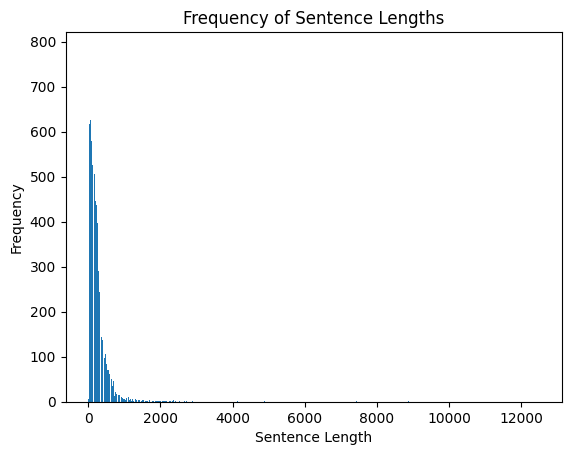

In [67]:
import matplotlib.pyplot as plt


length_frequency = {}
for length in dic.values():
    if length in length_frequency:
        length_frequency[length] += 1
    else:
        length_frequency[length] = 1

# Plot the frequency of sentence lengths
plt.bar(length_frequency.keys(), length_frequency.values())

# Label the axes
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Frequency of Sentence Lengths')

# Show the plot
plt.show()

In [68]:
length_frequency

{208: 458,
 174: 507,
 228: 423,
 152: 487,
 378: 158,
 128: 554,
 281: 314,
 96: 538,
 24: 331,
 278: 318,
 31: 569,
 201: 491,
 55: 669,
 927: 10,
 125: 492,
 49: 707,
 492: 98,
 77: 576,
 46: 727,
 57: 676,
 594: 64,
 246: 401,
 42: 708,
 135: 513,
 88: 566,
 54: 726,
 398: 149,
 33: 583,
 75: 575,
 714: 29,
 132: 509,
 518: 88,
 127: 506,
 279: 322,
 155: 552,
 109: 531,
 339: 208,
 129: 521,
 423: 116,
 198: 479,
 41: 727,
 60: 632,
 329: 225,
 113: 493,
 350: 223,
 121: 574,
 507: 83,
 48: 782,
 180: 504,
 93: 576,
 773: 25,
 285: 291,
 608: 52,
 241: 402,
 401: 147,
 670: 36,
 123: 525,
 214: 455,
 139: 555,
 108: 530,
 416: 135,
 29: 495,
 199: 469,
 148: 493,
 236: 386,
 876: 12,
 516: 69,
 140: 541,
 82: 562,
 76: 606,
 64: 622,
 209: 449,
 84: 565,
 92: 565,
 282: 328,
 187: 503,
 465: 97,
 542: 83,
 249: 378,
 21: 213,
 251: 369,
 186: 504,
 893: 12,
 74: 592,
 105: 521,
 162: 492,
 537: 74,
 774: 20,
 178: 498,
 99: 535,
 207: 441,
 165: 532,
 365: 181,
 780: 19,
 184: 493

In [69]:
x = pd.DataFrame(length_frequency,index=[i for i in range(len(length_frequency))])


In [70]:
x= pd.DataFrame(x.loc[0])

In [71]:
x1 = x[x[0].apply(lambda x:x>40)]
x1 = list(x1[0])
x2 = x[x[0].apply(lambda x:x>40)]
x2 = list(x2.index)

In [72]:
x1

[458,
 507,
 423,
 487,
 158,
 554,
 314,
 538,
 331,
 318,
 569,
 491,
 669,
 492,
 707,
 98,
 576,
 727,
 676,
 64,
 401,
 708,
 513,
 566,
 726,
 149,
 583,
 575,
 509,
 88,
 506,
 322,
 552,
 531,
 208,
 521,
 116,
 479,
 727,
 632,
 225,
 493,
 223,
 574,
 83,
 782,
 504,
 576,
 291,
 52,
 402,
 147,
 525,
 455,
 555,
 530,
 135,
 495,
 469,
 493,
 386,
 69,
 541,
 562,
 606,
 622,
 449,
 565,
 565,
 328,
 503,
 97,
 83,
 378,
 213,
 369,
 504,
 592,
 521,
 492,
 74,
 498,
 535,
 441,
 532,
 181,
 493,
 680,
 538,
 544,
 68,
 54,
 178,
 197,
 558,
 126,
 732,
 676,
 114,
 646,
 528,
 362,
 674,
 417,
 728,
 681,
 539,
 698,
 543,
 110,
 545,
 522,
 580,
 398,
 544,
 636,
 311,
 327,
 434,
 493,
 108,
 345,
 203,
 538,
 726,
 236,
 723,
 398,
 561,
 405,
 107,
 428,
 154,
 155,
 324,
 502,
 91,
 479,
 496,
 625,
 60,
 266,
 211,
 483,
 614,
 285,
 238,
 45,
 562,
 129,
 618,
 513,
 62,
 497,
 118,
 589,
 618,
 492,
 445,
 491,
 501,
 436,
 50,
 512,
 83,
 123,
 57,
 462,
 426,
 393

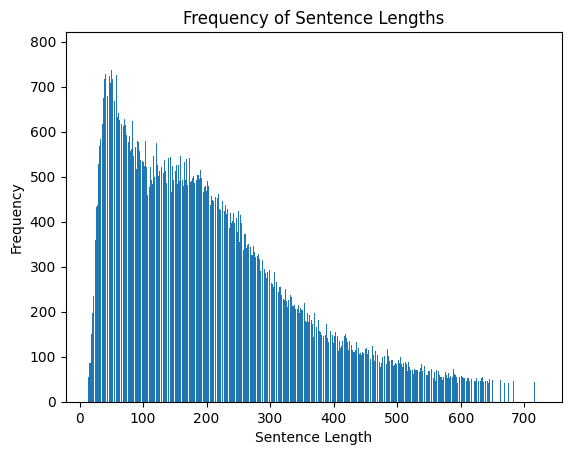

In [73]:

# Plot the frequency of sentence lengths
plt.bar(x2,x1)

# Label the axes
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Frequency of Sentence Lengths')

# Show the plot
plt.show()

In [74]:
### export process dat
pickle.dump(corpus,open('corpus.pkl','wb'))
pickle.dump(y,open('y.pkl','wb'))

In [75]:
len(y)

187648

In [76]:
tf.__version__

'2.10.1'

In [77]:
corpus = pickle.load(open('corpus.pkl','rb'))
y = pickle.load(open('y.pkl','rb'))




In [78]:
corpus

['ok downloaded app couple month ago first loved starting weird stuff reason would look song start playing give whole different song song never heard way matter hate much love song please fix otherwise love app',
 'love pinning idea holiday party homeschooling etc help keep thought one somewhat organized spot deleting pin board help wonder easier way lol something select pin want delete',
 'good cause get app turn perfectly navigable route stick world impossible left turn gated residential street dumping horribly mired traffic make u turn say realizing driving foot long truck traffic way bumper bumper never turning',
 'believe app get better add app get discover music even know really think app useful one thing realized use app get bit glitchy like said really like app',
 'app pretty good made playlist added song wanted put shuffle play weird song start playing think add app add song playlist annoying honestly would rather pay song itunes rather weird one added playlist even skip song 

In [79]:
len(corpus)

187648

In [80]:
len(y)

187648

In [8]:
# df = pd.DataFrame({
#     'review':pd.Series(corpus),
#     'feedback':pd.Series(y)
# })
# df

In [9]:
from tqdm import tqdm
def senten_word(corpus):
    words=[]
    tr = []
    for sent in tqdm(corpus):
        sent_token=sent_tokenize(sent)
        tr.append(sent_token)
        for sent in sent_token:
            x=simple_preprocess(sent)
            # print(x)
            if x==[] or x==' ':
                print(i)
                # print(sent)
                # print(sent_token)
            words.append(x)
    return words,tr

In [10]:
len(corpus)

104093

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train1, X_test1, y_train1, y_test1 = train_test_split(corpus,y,test_size=0.2,random_state=123)

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the data
tfidf_features = tfidf_vectorizer.fit_transform(X_train1)

# Use the TF-IDF features for further analysis
print(tfidf_features.toarray())  # Convert sparse matrix to array for display
# print(tfidf_vectorizer.get_feature_names())  # Get the feature names


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
tfidf_features.toarray().shape

(83274, 1000)

In [11]:
words,tr = senten_word(corpus)

100%|████████████████████████████████| 104093/104093 [00:04<00:00, 22766.50it/s]


In [17]:
words

[['music',
  'quality',
  'good',
  'found',
  'lot',
  'music',
  'like',
  'premium',
  'rewind',
  'repeat',
  'song',
  'ad',
  'fine',
  'go',
  'back',
  'song',
  'select',
  'one',
  'without',
  'premium',
  'kinda',
  'dumb',
  'opinion'],
 ['using',
  'uber',
  'past',
  'year',
  'frequently',
  'uber',
  'whole',
  'never',
  'fails',
  'disappoint',
  'issue',
  'always',
  'resolve',
  'problem',
  'constantly',
  'tell',
  'friend',
  'easy',
  'use',
  'uber',
  'app',
  'case',
  'hard',
  'teach',
  'old',
  'dog',
  'new',
  'trick',
  'maybe',
  'bad',
  'idea',
  'focus',
  'elderly',
  'teach',
  'download',
  'use',
  'aapp',
  'try',
  'wonder',
  'took',
  'long',
  'try',
  'thank',
  'wonderful',
  'service',
  'donna'],
 ['friend',
  'got',
  'ride',
  'mike',
  'super',
  'nice',
  'played',
  'great',
  'music',
  'awesome',
  'conversation',
  'best'],
 ['ordered',
  'uber',
  'already',
  'sitting',
  'front',
  'pier',
  'came',
  'asked',
  'luggage',

In [12]:
len(words)

104093

In [13]:
len(y)

104093

In [531]:
corpus.index('')

ValueError: '' is not in list

In [14]:
# Function to find arrays containing NaN values
def find_nan_arrays(arrays):
    nan_indices = []
    for i, array in enumerate(arrays):
        if isinstance(array, float) and np.isnan(array) and []:
            nan_indices.append(i)
        elif isinstance(array, np.ndarray) and np.isnan(array).any():
            nan_indices.append(i)
    return nan_indices

# Find arrays with NaN values
nan_array_indices = find_nan_arrays(words)

In [15]:
nan_array_indices

[]

In [22]:
len(words)

104093

In [23]:
len(y)

104093

In [536]:
# model = gensim.models.Word2Vec(words,workers=-1,min_count=6,vector_size=100)

In [26]:
g00gle_model = gensim.downloader.load("word2vec-google-news-300")


[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.9% 64.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.5% 107.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.1% 150.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.7% 194.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.3% 237.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.8% 278.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.3% 321.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.9% 364.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.4% 405.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.0% 448.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.5% 490.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.9% 530.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.5% 573.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 36.8% 612.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.3% 653.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.2% 684.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.1% 717.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.3% 753.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.7% 793.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 50.2% 834.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.7% 876.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.0% 898.7/1662.8MB downloaded

In [30]:
pickle.dump(g00gle_model,open('g00gle_model.pkl','wb'))

In [16]:
g00gle_model = pickle.load(open('g00gle_model.pkl','rb'))

In [17]:
g00gle_model.similar_by_word('expert')

[('Expert', 0.6505210399627686),
 ('experts', 0.6396763324737549),
 ('specialist', 0.6338786482810974),
 ('consultant', 0.6189979910850525),
 ('researcher', 0.6093093156814575),
 ('professor', 0.5994101762771606),
 ('emeritus_professor', 0.5655508637428284),
 ('associate_professor', 0.559867262840271),
 ('guru', 0.5574573278427124),
 ('lecturer', 0.5561577677726746)]

In [21]:
from concurrent.futures import ThreadPoolExecutor, as_completed

# Function to get average Word2Vec embedding for a document
def avg_w2v(doc):
    vectors = [g00gle_model[word] for word in doc if word in g00gle_model.index_to_key]
    
    if not vectors:
        return np.zeros(g00gle_model.vector_size)  # Handle empty vectors case
    
    return np.mean(vectors, axis=0)



# Function to process each document in parallel
def process_document(doc):
    
    return avg_w2v(doc)


# Initialize an empty list to store results
X = []

# Process documents in parallel
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    futures = [executor.submit(process_document, doc) for doc in tqdm(words)]

    # Collect results as they complete
    for future in as_completed(futures):
        X.append(future.result())

# X now contains the average Word2Vec embeddings for the documents


100%|█████████████████████████████████| 104093/104093 [01:36<00:00, 1080.18it/s]


In [57]:
len(y)

104093

In [58]:
len(X)

104093

In [32]:
pickle.dump(X,open('X.pkl','wb'))

In [6]:


X = pickle.load(open('X.pkl','rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'X.pkl'

In [64]:
X

[array([ 7.16613233e-02, -3.88930738e-02, -6.48903698e-02,  6.06836788e-02,
        -1.05224080e-01,  1.55502846e-02,  1.93502493e-02, -3.48419473e-02,
         1.19967826e-01,  4.38290313e-02, -5.45189939e-02, -9.99461189e-02,
        -1.14067337e-02, -6.49082586e-02, -8.15240294e-02,  6.13847934e-02,
         7.60166571e-02,  9.31775346e-02,  3.09132542e-02, -1.18379265e-01,
         5.18588349e-03,  9.74047408e-02, -1.16108861e-02,  9.08371527e-03,
        -4.69707604e-03,  4.94069047e-03, -4.02953066e-02,  1.01792686e-01,
         1.80430245e-02, -9.59585384e-02, -7.56714940e-02,  1.79948483e-03,
        -2.58126091e-02,  8.95144977e-03,  6.98192194e-02, -7.30008110e-02,
         3.16062123e-02, -7.53236935e-02,  4.97799590e-02,  2.86048688e-02,
         8.44616070e-02, -6.01459369e-02,  1.53372139e-01,  4.99534607e-03,
        -1.14340950e-02, -9.49888527e-02, -5.46379089e-02,  7.45033380e-04,
         4.33566645e-02, -8.27499945e-03, -4.30371501e-02,  1.69867147e-02,
        -2.6

In [95]:
# Function to find arrays containing NaN values
def find_nan_arrays(arrays):
    nan_indices = []
    for i, array in enumerate(arrays):
        if isinstance(array, float) and np.isnan(array):
            nan_indices.append(i)
        elif isinstance(array, np.ndarray) and np.isnan(array).any():
            nan_indices.append(i)
    return nan_indices

# Find arrays with NaN values
nan_array_indices = find_nan_arrays(y_train)

In [96]:
nan_array_indices

[]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [13]:
X_train_data,X_test_val,y_train_data,y_test_val = train_test_split(X_train,y_train,test_size=0.2,random_state=123)

In [45]:
tfidf_features.toarray().shape

(83274, 1000)

##  LSTM

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# Parameters
max_features = 20000  # Number of words to consider as features
maxlen = 300          # Cut texts after this number of words (among top max_features most common words)
batch_size = 32
embedding_dims = 128
lstm_units = 128
epochs = 5

# Convert labels to one-hot encoding
labels = to_categorical(y, num_classes=2)

# Load the IMDB dataset
x_train,x_test, y_train, y_test = train_test_split(corpus,labels,test_size=0.2,random_state=123)
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train


tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences (samples x time)

x_train = pad_sequences(x_train_seq, maxlen=maxlen)
x_test = pad_sequences(x_test_seq, maxlen=maxlen)



In [110]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [111]:


toke = pickle.load(open('tokenizer.pkl','rb'))

In [9]:
len(corpus)

104081

In [82]:
epochs = 5

# Build the model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(lstm_units, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(lstm_units,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(lstm_units))
model.add(Dense(2, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          2560000   
                                                                 
 lstm_3 (LSTM)               (None, 300, 128)          131584    
                                                                 
 dropout_2 (Dropout)         (None, 300, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 300, 128)          131584    
                                                                 
 dropout_3 (Dropout)         (None, 300, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 2)                

In [83]:



# Train the model
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')


Epoch 1/5
4692/4692 [==============================] - 920s 194ms/step - loss: 0.3669 - accuracy: 0.8374 - val_loss: 0.3332 - val_accuracy: 0.8520
Epoch 2/5
4692/4692 [==============================] - 900s 192ms/step - loss: 0.3091 - accuracy: 0.8652 - val_loss: 0.3348 - val_accuracy: 0.8554
Epoch 3/5
4692/4692 [==============================] - 900s 192ms/step - loss: 0.2720 - accuracy: 0.8832 - val_loss: 0.3402 - val_accuracy: 0.8502
Epoch 4/5
4692/4692 [==============================] - 913s 194ms/step - loss: 0.2375 - accuracy: 0.8992 - val_loss: 0.3532 - val_accuracy: 0.8514
Epoch 5/5
1173/1173 [==============================] - 85s 72ms/step - loss: 0.3873 - accuracy: 0.8430
Test score: 0.3872564435005188
Test accuracy: 0.8430055975914001


In [84]:
model.save('lstm_model.h5')

In [85]:
# Load the model
model1 = models.load_model('lstm_model.h5')
print("Model loaded successfully.")


Model loaded successfully.


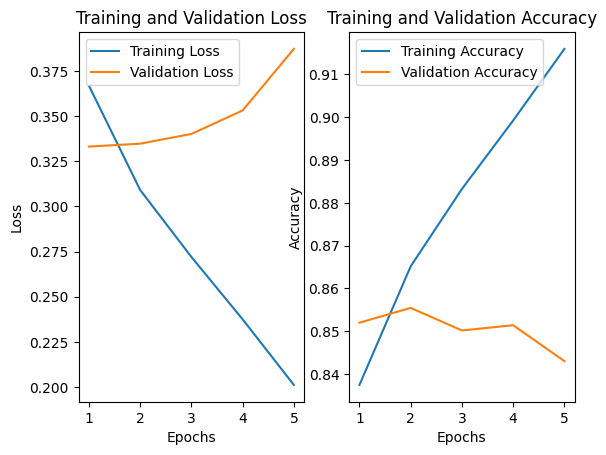

In [87]:
import matplotlib.pyplot as plt  

li = [i for i in range(1,6)]
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(li,hist.history['loss'], label='Training Loss')
plt.plot(li,hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(li,hist.history['accuracy'], label='Training Accuracy')
plt.plot(li,hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [97]:
y[14942]

0

In [98]:
corpus[14942]

'app spotty work time get error message saying uh oh trouble connecting server half time use really bummer hope get fixed asap'

In [121]:
# Parameters
# max_features = 20000  # Number of words to consider as features
maxlen = 300          # Cut texts after this number of words (among top max_features most common words)
batch_size = 32
embedding_dims = 128


# temp = []
temp =[''' I recently had the pleasure of watching the film "Inception," and it left an indelible mark on my cinematic experience. From the very first scene, I was captivated by the intricate plot, stunning visuals, and outstanding performances. ''']

def lemetization(mess):
    corpus = []
    stem = WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))
    pattern = re.compile('[^a-zA-Z]')
    pattern1 = re.compile(r'\b{}\b'.format(re.escape('br')))
                      
    for i in tqdm(range(0,len(mess))):
    #     review = re.sub('[^a-bA-B]',' ',mess[i])
        review = pattern.sub(' ', mess[i])
        cleaned_text = pattern1.sub('',review)
        review = review.lower().split()

        review = [stem.lemmatize(word) for word in review if not word in stop_words]
        review = ' '.join(review)
        corpus.append(review)
    return corpus


temp_lam = lemetization(temp)

print(temp_lam)

# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(x_train)

temp_toke = toke.texts_to_sequences(temp_lam)
# x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences (samples x time)

temp_toke_pad = pad_sequences(temp_toke, maxlen=maxlen)
# x_test = pad_sequences(x_test_seq, maxlen=maxlen)

pred = model.predict(temp_toke_pad)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 493.91it/s]

['recently pleasure watching film inception left indelible mark cinematic experience first scene captivated intricate plot stunning visuals outstanding performance']
1/1 [==============================] - 0s 70ms/step


In [122]:
pred

array([[8.6097437e-04, 9.9913895e-01]], dtype=float32)

# CNN

In [129]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Parameters
# max_features = 20000  # Number of words to consider as features
# maxlen = 300          # Cut texts after this number of words (among top max_features most common words)
# batch_size = 32
# embedding_dims = 128
conv_filters = 128
kernel_size = 5
# epochs = 5

# # Assume corpus and y are your text data and labels respectively
# # Convert labels to one-hot encoding
# labels = to_categorical(y, num_classes=2)

# # Split the dataset into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2, random_state=123)

# # Initialize and fit the tokenizer
# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(x_train)

# # Convert text to sequences
# x_train_seq = tokenizer.texts_to_sequences(x_train)
# x_test_seq = tokenizer.texts_to_sequences(x_test)

# # Pad sequences (samples x time)
# x_train = pad_sequences(x_train_seq, maxlen=maxlen)
# x_test = pad_sequences(x_test_seq, maxlen=maxlen)

# Build the model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
hist1 = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 128)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [130]:
model.save('cnn_model.h5')

In [131]:
cnn_model = models.load_model('cnn_model.h5')

In [132]:
corpus[4389]

'leaving fb participate movement label fb publisher platform want power suppress like publisher protection lawsuit like platform respect right limit speech context publisher company little integrity human right concern u around world look much money fb make chinese market research software development cater chinese censorship requirement working oppressive government much proof need fb worship money speech mention many employee leave every year pointing anonymously fear retaliation ethic concern company goebbels would proud fb'

In [133]:
y[4389]

0

In [144]:
# Parameters
# max_features = 20000  # Number of words to consider as features
# maxlen = 300          # Cut texts after this number of words (among top max_features most common words)
# batch_size = 32
# embedding_dims = 128


# temp = []
temp =[''' Sure, here's a neutral review with a length of 30 words:

---

The movie was okay. The plot had some interesting moments, but overall it felt average. The acting was decent, and the visuals were fine. Worth a watch if you have time. ''']

def lemetization(mess):
    corpus = []
    stem = WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))
    pattern = re.compile('[^a-zA-Z]')
    pattern1 = re.compile(r'\b{}\b'.format(re.escape('br')))
                      
    for i in tqdm(range(0,len(mess))):
    #     review = re.sub('[^a-bA-B]',' ',mess[i])
        review = pattern.sub(' ', mess[i])
        cleaned_text = pattern1.sub('',review)
        review = review.lower().split()

        review = [stem.lemmatize(word) for word in review if not word in stop_words]
        review = ' '.join(review)
        corpus.append(review)
    return corpus


temp_lam = lemetization(temp)

print(temp_lam)

# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(x_train)

temp_toke = toke.texts_to_sequences(temp_lam)
# x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences (samples x time)

temp_toke_pad = pad_sequences(temp_toke, maxlen=maxlen)
# x_test = pad_sequences(x_test_seq, maxlen=maxlen)

pred = cnn_model.predict(temp_toke_pad)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.83it/s]

['sure neutral review length word movie okay plot interesting moment overall felt average acting decent visuals fine worth watch time']
1/1 [==============================] - 0s 31ms/step


In [145]:
(pred[0])

array([0.9955005 , 0.00449951], dtype=float32)

In [ ]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a custom transformer to convert text data to sequences
class TextToSequence(BaseEstimator, TransformerMixin):
    def __init__(self, maxlen=100):
        self.tokenizer = Tokenizer()
        self.maxlen = maxlen

    def fit(self, X, y=None):
        self.tokenizer.fit_on_texts(X)
        return self

    def transform(self, X, y=None):
        X_seq = self.tokenizer.texts_to_sequences(X)
        X_pad = pad_sequences(X_seq, maxlen=self.maxlen, padding='post')
        return X_pad

# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define RNN model
def create_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define a voting classifier with ensemble learning
estimators = []
estimators.append(('lstm', KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=64, verbose=0)))
estimators.append(('cnn', KerasClassifier(build_fn=create_cnn_model, epochs=5, batch_size=64, verbose=0)))
estimators.append(('rnn', KerasClassifier(build_fn=create_rnn_model, epochs=5, batch_size=64, verbose=0)))
estimators.append(('svm', svm_pipeline))
estimators.append(('nb', nb_pipeline))
estimators.append(('gbm', gbm_pipeline))
ensemble_model = VotingClassifier(estimators)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_pred = ensemble_model.predict(X_test)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

# Print accuracy
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")


In [139]:
X_train

5    This is the worst product ever.
2               I love this product!
4               I love this product!
3    This is the worst product ever.
Name: text, dtype: object